# Exploratory Data Analysis

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

## Import csv, create dataframe, and examine data as is.

In [2]:
df = pd.read_csv('fundamental_data.csv')

In [3]:
df.drop('largest_institutional_owner', axis=1, inplace=True)

df['dividend_payout_ratio'] = df['dividend_payout_ratio']*100
df['g_revenue'] = df['g_revenue']*100
df['gross_margin'] = df['gross_margin_pct']*100
df['ebitda_margin'] = df['ebitda_margin_pct']*100
df['return_on_assets'] = df['return_on_assets']*100
df['return_on_equity'] = df['return_on_equity']*100

print(df.shape)
df.head()

(2354, 17)


,ticker,company_name,market_cap,52_week_delta,dividend_payout_ratio,forward_eps,g_revenue,gross_margin_pct,ebitda_margin_pct,price_to_forward_earnings,price_to_book,debt_to_equity,return_on_assets,return_on_equity,recommendation,gross_margin,ebitda_margin
0,PIH,1347 Property Insurance Holding,2.949712e+07,-0.0020661354,0.000000,1.15,74.9,0.27115,0.00544,4.261,0.772505,0.000,0.078,2.515000,none,27.115000,0.544
1,FLWS,"1-800 FLOWERS.COM, Inc.",4.671769e+08,0.061797738,0.000000,0.68,10.5,0.42145,0.06150,19.059,2.539682,52.765,4.989,11.756000,buy,42.145002,6.150
2,SRCE,1st Source Corporation,1.305030e+09,0.12263334,29.860002,3.55,9.7,0.00000,0.00000,14.411,1.604869,0.000,1.409,11.557999,hold,0.000000,0.000
3,TWOU,"2U, Inc.",1.430769e+09,-0.60269946,0.000000,-1.09,43.8,0.73874,-0.11690,-20.679,1.949153,42.584,-7.259,-26.075000,hold,73.874000,-11.690
4,DDD,3D Systems Corporation,1.016644e+09,-0.2521739,0.000000,0.09,-5.6,0.44765,-0.00901,95.389,1.958257,19.777,-4.547,-12.539000,hold,44.765000,-0.901


In [4]:
df['recommendation'].value_counts()

buy             1276
hold             709
none             221
strong_buy       126
underperform      22
Name: recommendation, dtype: int64

In [5]:
df.isna().sum()

ticker                       0
company_name                 0
market_cap                   0
52_week_delta                0
dividend_payout_ratio        0
forward_eps                  0
g_revenue                    0
gross_margin_pct             0
ebitda_margin_pct            0
price_to_forward_earnings    0
price_to_book                0
debt_to_equity               0
return_on_assets             0
return_on_equity             0
recommendation               0
gross_margin                 0
ebitda_margin                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 17 columns):
ticker                       2354 non-null object
company_name                 2354 non-null object
market_cap                   2354 non-null float64
52_week_delta                2354 non-null object
dividend_payout_ratio        2354 non-null float64
forward_eps                  2354 non-null float64
g_revenue                    2354 non-null float64
gross_margin_pct             2354 non-null float64
ebitda_margin_pct            2354 non-null float64
price_to_forward_earnings    2354 non-null float64
price_to_book                2354 non-null float64
debt_to_equity               2354 non-null float64
return_on_assets             2354 non-null float64
return_on_equity             2354 non-null float64
recommendation               2354 non-null object
gross_margin                 2354 non-null float64
ebitda_margin                2354 non-null float64
dtypes: float64(13), object(4)

### Column '52_week_delta' is type object instead of float. This needs to be corrected

In [7]:
df['52_week_delta'] = df['52_week_delta'].map(lambda x: float(x))

In [8]:
df['52_week_delta'].value_counts()

 0.000000    3
 0.148768    3
-0.090909    2
 inf         2
-0.307692    2
            ..
-0.578571    1
-0.045843    1
 0.135481    1
 0.267009    1
-0.187500    1
Name: 52_week_delta, Length: 2340, dtype: int64

### Other cleaning needed

#### Steps taken: (NEEDS TO BE REWRITEN)
1. Drop the 2 companies that have 'inf' for 52_week_change. This is because they became public this year and are too young for proper analyst recommendations.


2. Drop the 'shares_outstanding' column and take the log of market_cap. We will then drop the market_cap column


3. Set a limits on our features view more normal companies.


4. Standard scale the data 


5. Only analyze companies held by the top 5 institutional holders

In [9]:
# step 1
df['52_week_delta'] = df['52_week_delta']*100
df = df[(df['52_week_delta'] != np.inf) &
        ((df['dividend_payout_ratio'] <= 100) & (df['dividend_payout_ratio'] >= 0)) &
        ((df['price_to_book'] <= 50) & (df['price_to_book'] >= 0)) &
        ((df['debt_to_equity'] <= 500) & (df['debt_to_equity'] >= 0))
       ]

# step 2
df['log_mktcap'] = np.log(df['market_cap'])
df.drop(['market_cap', 'gross_margin_pct', 'ebitda_margin_pct'], axis=1, inplace=True)

# step 3
df = df[
    ((df['forward_eps'] <= 50) & (df['forward_eps'] >= -50)) &
    ((df['price_to_forward_earnings'] <= 2000) & (df['price_to_forward_earnings'] >= -2000)) &
     (df['g_revenue'] <= 1000) &
     (df['gross_margin'] >= -100)
]

# # step 4
# df = df[
#     (df['largest_institutional_owner'] == 'Blackrock Inc.') |
#     (df['largest_institutional_owner'] == 'Vanguard Group, Inc. (The)') |
#     (df['largest_institutional_owner'] == 'Price (T.Rowe) Associates Inc') |
#     (df['largest_institutional_owner'] == 'FMR, LLC') |
#     (df['largest_institutional_owner'] == 'Dimensional Fund Advisors LP')
# ]

In [10]:
labels = ['log_mktcap', 'dividend_payout_ratio', '52_week_delta', 'forward_eps',
          'g_revenue', 'gross_margin', 'ebitda_margin', 'price_to_forward_earnings',
          'price_to_book', 'debt_to_equity', 'return_on_assets', 'return_on_equity']

In [11]:
print('Statistical Summary of Continuous Variables')
print('--'*40)
print(df[labels].describe().transpose())
print('--'*40)

Statistical Summary of Continuous Variables
--------------------------------------------------------------------------------
                            count       mean        std          min  \
log_mktcap                 2033.0  21.245595   2.074959    12.436890   
dividend_payout_ratio      2033.0  17.994117  24.484351     0.000000   
52_week_delta              2033.0  12.980231  46.212119   -97.894734   
forward_eps                2033.0   2.908608   4.181940   -14.570000   
g_revenue                  2033.0  10.788047  53.422205   -99.700000   
gross_margin               2033.0  37.252827  27.884612   -90.286005   
ebitda_margin              2033.0  10.995759  27.326867  -275.405000   
price_to_forward_earnings  2033.0  17.383601  83.582948 -1615.647000   
price_to_book              2033.0   3.627350   4.591514     0.003954   
debt_to_equity             2033.0  83.565335  92.245094     0.000000   
return_on_assets           2033.0   1.627371  11.068405  -127.836000   
return_on_e

## Visualize our data

### Target Varaible

In [12]:
# Analyst Rating Count
print('Target Variable')
print(df.groupby(['recommendation']).recommendation.count())

Target Variable
recommendation
buy             1108
hold             592
none             200
strong_buy       116
underperform      17
Name: recommendation, dtype: int64


In [13]:
# Statistical summary of continuous variables 
print('Statistical Summary of Continuous Variables Grouped By Target Variable')
print('--'*40)

print('Strong Buy')
print(df[df['recommendation'] == 'strong_buy'][labels].describe().transpose())
print('--'*40)


print('Buy')
print(df[df['recommendation'] == 'buy'][labels].describe().transpose())
print('--'*40)

print('Hold')
print(df[df['recommendation'] == 'hold'][labels].describe().transpose())
print('--'*40)

print('Underperformer')
print(df[df['recommendation'] == 'underperform'][labels].describe().transpose())
print('--'*40)

print('None')
print(df[df['recommendation'] == 'none'][labels].describe().transpose())
print('--'*40)

Statistical Summary of Continuous Variables Grouped By Target Variable
--------------------------------------------------------------------------------
Strong Buy
                           count       mean        std         min        25%  \
log_mktcap                 116.0  19.942976   1.700471   16.445360  18.638876   
dividend_payout_ratio      116.0   8.269483  18.006752    0.000000   0.000000   
52_week_delta              116.0  10.499534  63.718248  -90.513283 -21.301940   
forward_eps                116.0   1.256810   2.585170   -6.420000  -0.165000   
g_revenue                  116.0  27.346552  90.867581  -82.200000  -2.125000   
gross_margin               116.0  37.481293  28.690103  -86.864000  18.668500   
ebitda_margin              116.0  -2.915293  39.949016 -212.376000   0.000000   
price_to_forward_earnings  116.0   8.079112  55.969646 -230.541000  -2.617750   
price_to_book              116.0   3.826427   4.889772    0.148603   1.390894   
debt_to_equity             

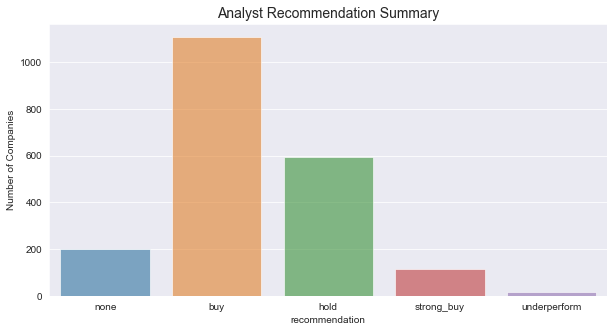

In [14]:
# Target Variable Countplot
sns.set_style('darkgrid');
plt.figure(figsize = (10,5));
sns.countplot(df['recommendation'], alpha =.6);
plt.title('Analyst Recommendation Summary', fontsize=14);
plt.ylabel('Number of Companies');
plt.show();

In [15]:
#group the strong buys with buys

buy_recos = ['buy', 'strong_buy']

df['analyst_rating'] = ''

for i in range(df.shape[0]):
    if df['recommendation'].iloc[i] in buy_recos:
        df['analyst_rating'].iloc[i] = 1
    else:
        df['analyst_rating'].iloc[i] = 0
df.drop('recommendation', axis=1, inplace=True)

In [16]:
# Analyst Rating Count
print("Target Variable (1 = 'Buy', 0 = 'Not_Buy')")
print(df.groupby(['analyst_rating']).analyst_rating.count())

Target Variable (1 = 'Buy', 0 = 'Not_Buy')
analyst_rating
0     809
1    1224
Name: analyst_rating, dtype: int64


In [17]:
# Statistical summary of continuous variables 
print('Statistical Summary of Continuous Variables Grouped By Target Variable')
print('--'*40)

print('Buy')
print(df[df['analyst_rating'] == 1][labels].describe().transpose())
print('--'*40)

print('Not_Buy')
print(df[df['analyst_rating'] == 0][labels].describe().transpose())
print('--'*40)

Statistical Summary of Continuous Variables Grouped By Target Variable
--------------------------------------------------------------------------------
Buy
                            count       mean        std          min  \
log_mktcap                 1224.0  21.512452   2.077310    12.436890   
dividend_payout_ratio      1224.0  15.806544  23.358883     0.000000   
52_week_delta              1224.0  18.350642  47.364397   -97.894734   
forward_eps                1224.0   3.078570   4.264218   -14.570000   
g_revenue                  1224.0  15.257843  62.010599   -99.700000   
gross_margin               1224.0  39.226559  28.862811   -89.906996   
ebitda_margin              1224.0  10.091743  30.412251  -275.405000   
price_to_forward_earnings  1224.0  18.024254  92.389733 -1615.647000   
price_to_book              1224.0   4.188281   5.157406     0.011418   
debt_to_equity             1224.0  87.250398  92.940660     0.000000   
return_on_assets           1224.0   1.267863  11.121

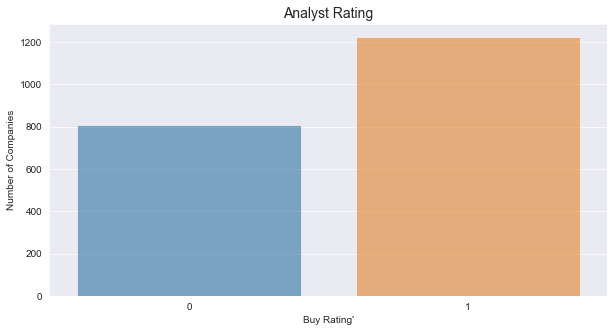

In [18]:
# Target Variable Countplot
sns.set_style('darkgrid');
plt.figure(figsize = (10,5));
sns.countplot(df['analyst_rating'], alpha =.6);
plt.title('Analyst Rating', fontsize=14);
plt.ylabel('Number of Companies');
plt.xlabel("Buy Rating'")
plt.show();

#### Examine Numerical Correlations

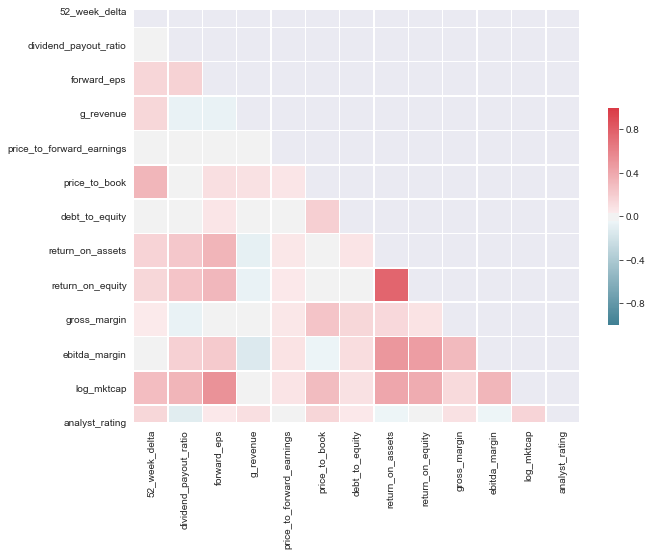

In [19]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

#create mask
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#create color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, cmap=cmap,
            center=0, vmin=-1, vmax=1,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, ax=ax);

### Discrete Variable

In [20]:
# print('Institutional Owernship Summary')
# print(df.groupby('largest_institutional_owner').largest_institutional_owner.count().sort_values(ascending=False))
# print('\n')

# # Institutional owernship summary
# print('Institutional Owernship Summary')
# print(df.groupby(['largest_institutional_owner','analyst_rating']).largest_institutional_owner.count().unstack())

# # Institutional ownership visualization
# top5 = df.groupby(['largest_institutional_owner','analyst_rating']).largest_institutional_owner.count().unstack();
# p1 = top5.plot(kind ='bar', stacked = True, 
#                    title = 'Top 5 Institutional Ownership', alpha = .6);
# p1.set_xlabel('Asset Manager');
# p1.set_ylabel('# of Companies');
# p1.legend(['Buy', 'Not_Buy']);
# plt.show();

In [21]:
# # prepare data for a correlation matrix
# inst_dummies = pd.get_dummies(df['largest_institutional_owner'])

# df_inst = df[['largest_institutional_owner', 'analyst_rating']]
# df_inst.drop('largest_institutional_owner', axis=1, inplace=True)
# df_inst = pd.concat([df_inst, inst_dummies], axis=1)

# #create figure
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111)

# #create mask
# mask = np.zeros_like(df_inst.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# #create color scheme
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# sns.heatmap(df_inst.corr(), mask=mask, cmap=cmap,
#             center=0, vmin=-0.4, vmax=0.4,
#             square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, ax=ax);

### Continuous Variables

Let's visualize each continuous feature

#### Market Cap

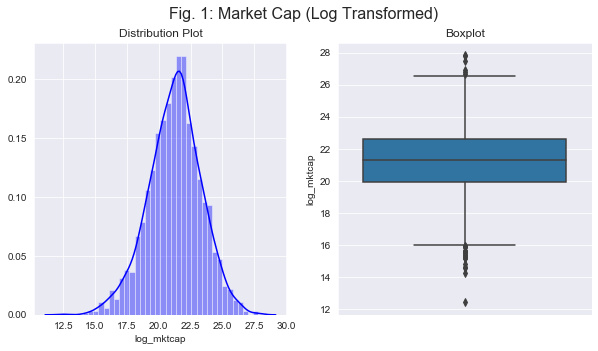

In [22]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 1: Market Cap (Log Transformed)', fontsize=16);

ax1 = fig.add_subplot(121);
sns.distplot(df['log_mktcap'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');

ax2 = fig.add_subplot(122);
sns.boxplot(df['log_mktcap'], orient='v');
ax2.set_title('Boxplot');

#### Dividend Payout Ratio

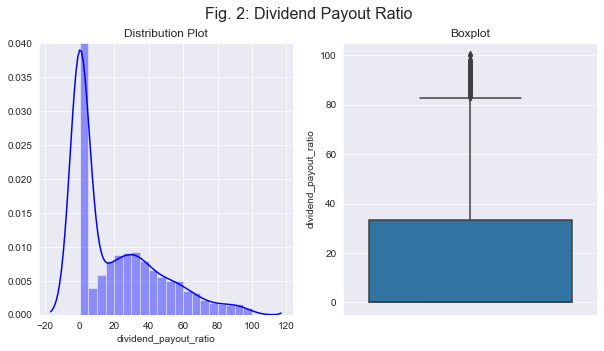

In [23]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 2: Dividend Payout Ratio', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['dividend_payout_ratio'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_ylim(0, 0.04)

ax2 = fig.add_subplot(122);
sns.boxplot(df['dividend_payout_ratio'], orient='v', ax=ax2);
ax2.set_title('Boxplot');

#### Earnings Per Share

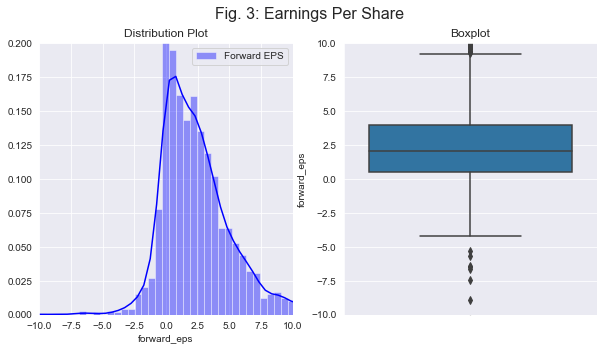

In [24]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 3: Earnings Per Share', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['forward_eps'], bins='auto', color='b', ax=ax1, label='Forward EPS');
ax1.set_title('Distribution Plot');
ax1.legend();
ax1.set_xlim(-10,10);
ax1.set_ylim(0, 0.2);

ax2 = fig.add_subplot(122);
sns.boxplot(df['forward_eps'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-10,10);

#### Price to Earnings (P/E)

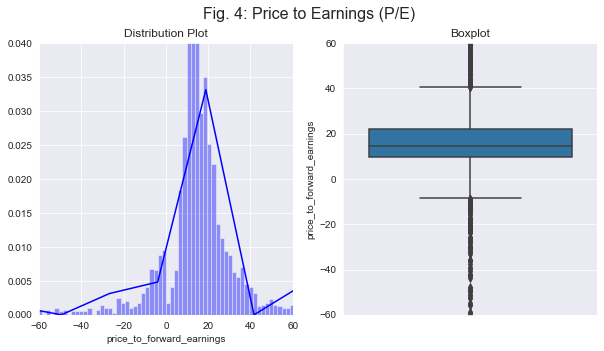

In [25]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 4: Price to Earnings (P/E)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['price_to_forward_earnings'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_xlim(-60,60);
ax1.set_ylim(0, 0.04);

ax2 = fig.add_subplot(122);
sns.boxplot(df['price_to_forward_earnings'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-60,60);

#### Price to Book (P/B)

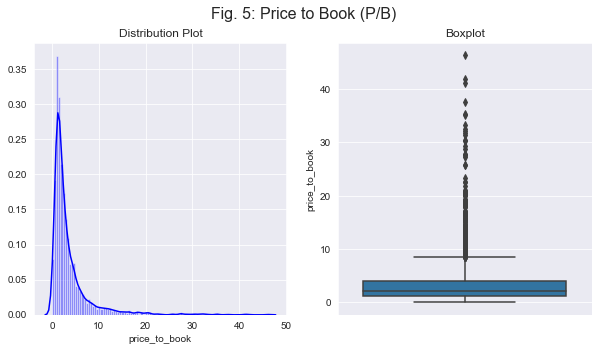

In [26]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 5: Price to Book (P/B)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['price_to_book'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');

ax2 = fig.add_subplot(122);
sns.boxplot(df['price_to_book'], orient='v', ax=ax2);
ax2.set_title('Boxplot');

#### Revenue Growth Rate

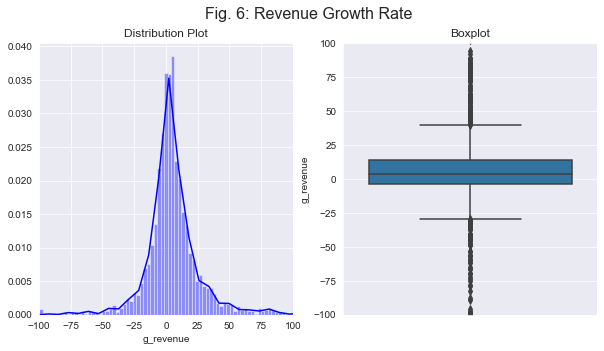

In [27]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 6: Revenue Growth Rate', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['g_revenue'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_xlim(-100,100);

ax2 = fig.add_subplot(122);
sns.boxplot(df['g_revenue'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-100,100);

### Margins

In [28]:
gross = df['gross_margin'].tolist()
ebitda = df['ebitda_margin'].tolist()

x = []
y = []

margins = [
    {
        'type' : 'gross',
        'data' : gross
    },
    {
        'type' : 'ebitda',
        'data' : ebitda
    }
]

for margin_type in margins:
    for i in range(len(gross)):
        x.append(margin_type['type'])
        y.append(margin_type['data'][i])

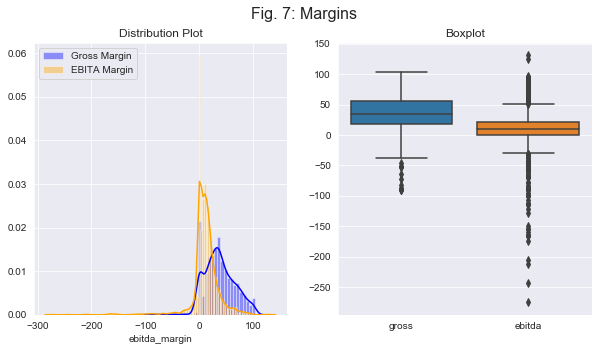

In [29]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 7: Margins', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['gross_margin'], bins='auto', color='b', ax=ax1, label='Gross Margin');
sns.distplot(df['ebitda_margin'], bins='auto', color='orange', ax=ax1, label='EBITA Margin');
ax1.set_title('Distribution Plot');
ax1.legend();

ax2 = fig.add_subplot(122);
sns.boxplot(x, y, orient='v', ax=ax2);
ax2.set_title('Boxplot');

#### Debt-to-Equity (D/B)

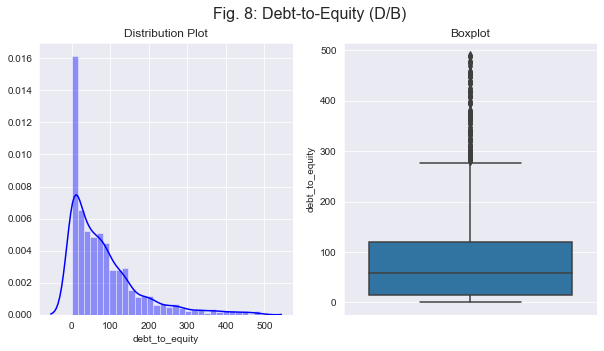

In [30]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 8: Debt-to-Equity (D/B)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['debt_to_equity'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');

ax2 = fig.add_subplot(122);
sns.boxplot(df['debt_to_equity'], orient='v', ax=ax2);
ax2.set_title('Boxplot');

#### Performance Metrics

In [31]:
fifty_two = df['52_week_delta'].tolist()
roa = df['return_on_assets'].tolist()
roe = df['return_on_equity'].tolist()

x = []
y = []

performance_metrics = [
    {
        'type' : 'fifty_two',
        'data' : fifty_two
    },
    {
        'type' : 'roa',
        'data' : roa
    },
    {
        'type' : 'roe',
        'data' : roe
    }
]

for performance_metric in performance_metrics:
    for i in range(len(fifty_two)):
        x.append(performance_metric['type'])
        y.append(performance_metric['data'][i])

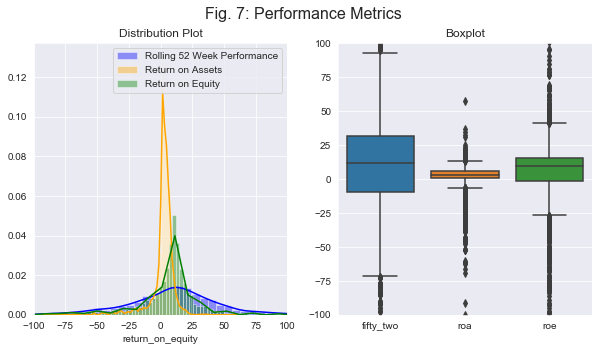

In [32]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 7: Performance Metrics', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['52_week_delta'], bins='auto', color='b', ax=ax1, label='Rolling 52 Week Performance');
sns.distplot(df['return_on_assets'], bins='auto', color='orange', ax=ax1, label='Return on Assets');
sns.distplot(df['return_on_equity'], bins='auto', color='green', ax=ax1, label='Return on Equity');
ax1.set_title('Distribution Plot');
ax1.legend();
ax1.set_xlim(-100,100);

ax2 = fig.add_subplot(122);
sns.boxplot(x, y, orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-100,100);

In [33]:
# save dataframe to csv
df.to_csv('final_fundamental_data.csv', index=False)